## Import Dependencies

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

## Read in CSV

In [2]:
# Read the csv file into a pandas DataFrame
energy = pd.read_csv('../Energy_Project/Resources/AEP_hourly.csv')
energy.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


## What does our data look like

In [3]:
#what are our columns
energy.columns

Index(['Datetime', 'AEP_MW'], dtype='object')

In [4]:
#what is our data
energy.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [5]:
#what does our data look like
energy.shape

(121273, 2)

## Formatting Datetime to extract year, month, day, and hour for analysis

In [6]:
#formatting Datetime
energy['Datetime'] = pd.to_datetime(energy.Datetime,format='%Y-%m-%d %H:%M:%S')

In [7]:
energy.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

In [8]:
energy["year"] = energy['Datetime'].map(lambda x: x.year)

In [9]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 3 columns):
Datetime    121273 non-null datetime64[ns]
AEP_MW      121273 non-null float64
year        121273 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.8 MB


In [10]:
energy.head()

,Datetime,AEP_MW,year
0,2004-12-31 01:00:00,13478.0,2004
1,2004-12-31 02:00:00,12865.0,2004
2,2004-12-31 03:00:00,12577.0,2004
3,2004-12-31 04:00:00,12517.0,2004
4,2004-12-31 05:00:00,12670.0,2004


In [29]:
energy["month"] = energy['Datetime'].map(lambda x: x.month)

In [30]:
energy["day"] = energy['Datetime'].map(lambda x: x.day)

In [31]:
energy["hour"] = energy['Datetime'].map(lambda x: x.hour)

In [33]:
energy.head()

,Datetime,AEP_MW,year,weekday,hour,month,day
0,2004-12-31 01:00:00,13478.0,2004,4,1,12,31
1,2004-12-31 02:00:00,12865.0,2004,4,2,12,31
2,2004-12-31 03:00:00,12577.0,2004,4,3,12,31
3,2004-12-31 04:00:00,12517.0,2004,4,4,12,31
4,2004-12-31 05:00:00,12670.0,2004,4,5,12,31


In [34]:
energy["weekday"] = energy['Datetime'].map(lambda x: x.weekday())

In [35]:
energy.head()

,Datetime,AEP_MW,year,weekday,hour,month,day
0,2004-12-31 01:00:00,13478.0,2004,4,1,12,31
1,2004-12-31 02:00:00,12865.0,2004,4,2,12,31
2,2004-12-31 03:00:00,12577.0,2004,4,3,12,31
3,2004-12-31 04:00:00,12517.0,2004,4,4,12,31
4,2004-12-31 05:00:00,12670.0,2004,4,5,12,31


In [36]:
weekday_df = energy.groupby("weekday").mean()

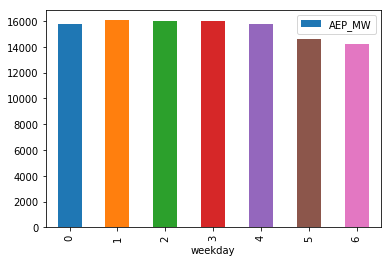

In [37]:
weekday_df.plot.bar(y="AEP_MW")

In [38]:
from scipy.stats import ttest_ind

In [39]:
wd3 = energy[energy["weekday"]==3]["AEP_MW"]

In [40]:
wd6 = energy[energy["weekday"]==6]["AEP_MW"]

In [41]:
ttest_ind(wd3,wd6)

Ttest_indResult(statistic=69.25707255380584, pvalue=0.0)

In [42]:
tstat,pvalue=ttest_ind(wd3,wd6)

In [43]:
print(tstat)

69.25707255380584


In [44]:
print(pvalue)

0.0


In [45]:
len(wd3)

17327

In [46]:
len(wd6)

17308

In [47]:
hour_df = energy.groupby("hour").mean()

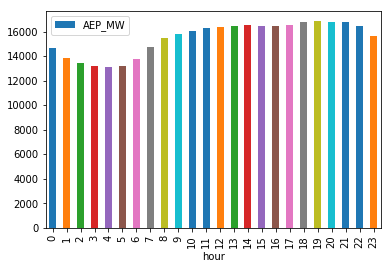

In [29]:
hour_df.plot.bar(y="AEP_MW")

In [48]:
energy.describe()

,AEP_MW,year,weekday,hour,month,day
count,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000
mean,15499.513717,2011.169988,2.999513,11.501587,6.500309,15.723220
std,2591.399065,4.011177,1.999816,6.921830,3.461454,8.802246
min,9581.000000,2004.000000,0.000000,0.000000,1.000000,1.000000
25%,13630.000000,2008.000000,1.000000,6.000000,4.000000,8.000000
50%,15310.000000,2011.000000,3.000000,12.000000,6.000000,16.000000
75%,17200.000000,2015.000000,5.000000,18.000000,10.000000,23.000000
max,25695.000000,2018.000000,6.000000,23.000000,12.000000,31.000000


In [49]:
year_df = energy.groupby("year").mean()

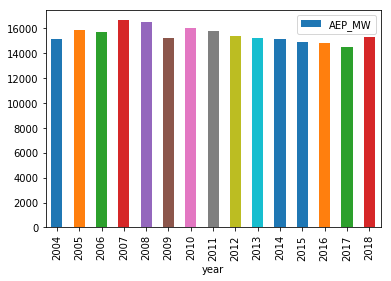

In [50]:
year_df.plot.bar(y="AEP_MW")

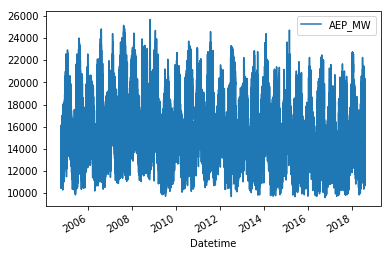

In [51]:
energy.plot(x="Datetime", y="AEP_MW", kind="line")

In [52]:
year_2007 = energy[energy["year"]==2007]

In [53]:
year_2007.head()

,Datetime,AEP_MW,year,weekday,hour,month,day
10988,2007-01-01 00:00:00,12796.0,2007,0,0,1,1
19723,2007-12-31 01:00:00,15075.0,2007,0,1,12,31
19724,2007-12-31 02:00:00,14780.0,2007,0,2,12,31
19725,2007-12-31 03:00:00,14715.0,2007,0,3,12,31
19726,2007-12-31 04:00:00,14685.0,2007,0,4,12,31


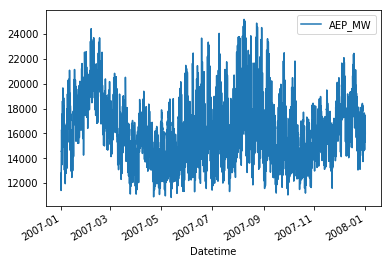

In [54]:
year_2007.plot(x="Datetime", y="AEP_MW", kind="line")

In [55]:
year_2018 = energy[energy["year"]==2018]

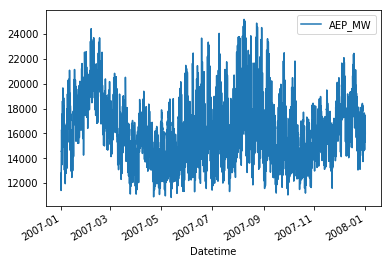

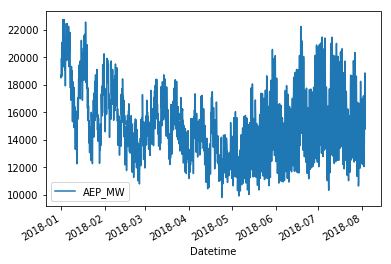

In [56]:
year_2007.plot(x="Datetime", y="AEP_MW", kind="line")
year_2018.plot(x="Datetime", y="AEP_MW", kind="line")

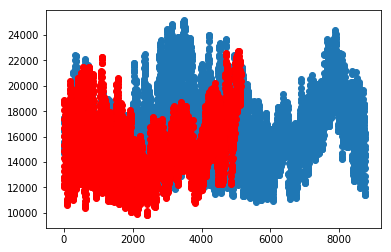

In [57]:
plt.scatter(x=np.arange(len(year_2007)),y=year_2007["AEP_MW"].values)
plt.scatter(x=np.arange(len(year_2018)),y=year_2018["AEP_MW"].values,color="r")

In [58]:
np.arange(len(year_2007))

array([   0,    1,    2, ..., 8755, 8756, 8757])